Bert and TSNE 
https://github.com/mcelikkaya/medium_articles2/blob/main/bertlda_topic_modeling.ipynb 

In [2]:
import torch
from transformers import BertTokenizer, BertModel
import logging
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import Counter
from functools import reduce

 
model_bert = SentenceTransformer('bert-base-nli-max-tokens')                             

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/397 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [10]:
df_summary = pd.read_csv("/data and algorithm/Book_summary.csv")
df_summary = df_summary.drop_duplicates(subset=['Book-Title'])
df_summary

,Unnamed: 0,Book-Title,Book-Author_x,Book-Summary,ISBN
0,0,A Clockwork Orange,Anthony Burgess,"Alex, a teenager living in near-future Englan...",345316413X
5,5,The Plague,Albert Camus,The text of The Plague is divided into five p...,0075536498
7,7,An Enquiry Concerning Human Understanding,David Hume,The argument of the Enquiry proceeds by a ser...,0872202291
8,8,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul Bäumer, a Ge...",0449213943
12,12,A Wizard of Earthsea,Ursula K. Le Guin,"Ged is a young boy on Gont, one of the larger...",0689317204
...,...,...,...,...,...
13775,13776,Gates of Paradise,V. C. Andrews,"A novel about Annie Stonewall, the daughter o...",0671670646
13777,13778,Shelter,Harlan Coben,"After Mickey Bolitar moves in with his uncle,...",0385313896
13780,13781,Remote Control,Andy McNab,The series follows the character of Nick Ston...,0345428056
13784,13785,The Simpsons: A Complete Guide to Our Favorite...,Matt Groening,"{| class=""wikitable"" |- !Seasons covered !Boo...",0060952520


In [11]:
def all_books_to_vecs(books):
  embedding_bert = np.array(model_bert.encode(books))
  return embedding_bert

def reduce_tsne(embedding):
    tsne = TSNE(n_components=2)
    reduced = tsne.fit_transform( embedding )
    
    return reduced

def predict_topics_with_kmeans(embeddings,num_topics):
  kmeans_model = KMeans(num_topics)
  kmeans_model.fit(embeddings)
  topics_labels = kmeans_model.predict(embeddings)
  return topics_labels

def unique(list1):
 
    # Print directly by using * symbol
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

In [12]:
all_summary_list = df_summary["Book-Summary"].tolist()
all_summary_embeddings = all_books_to_vecs(all_summary_list)
all_summary_embeddings.shape

(5850, 768)

In [14]:
num_topics = 50
embedding_bert_tsne =  reduce_tsne(all_summary_embeddings)
labels_bert_tsne  = predict_topics_with_kmeans(embedding_bert_tsne,num_topics)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [15]:
df_summary["group"] = labels_bert_tsne
df_summary["vector"] = all_summary_embeddings.tolist()
df_summary

,Unnamed: 0,Book-Title,Book-Author_x,Book-Summary,ISBN,group,vector
0,0,A Clockwork Orange,Anthony Burgess,"Alex, a teenager living in near-future Englan...",345316413X,23,"[-0.29636892676353455, 0.8470680117607117, 0.7..."
5,5,The Plague,Albert Camus,The text of The Plague is divided into five p...,0075536498,47,"[0.2956414222717285, 1.319756031036377, 0.3554..."
7,7,An Enquiry Concerning Human Understanding,David Hume,The argument of the Enquiry proceeds by a ser...,0872202291,5,"[1.2887966632843018, 1.2676935195922852, 1.117..."
8,8,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul Bäumer, a Ge...",0449213943,8,"[0.2628381550312042, 1.452850103378296, 1.0604..."
12,12,A Wizard of Earthsea,Ursula K. Le Guin,"Ged is a young boy on Gont, one of the larger...",0689317204,32,"[-0.12000640481710434, 1.7298859357833862, 0.7..."
...,...,...,...,...,...,...,...
13775,13776,Gates of Paradise,V. C. Andrews,"A novel about Annie Stonewall, the daughter o...",0671670646,14,"[0.37652456760406494, 1.5239266157150269, 0.91..."
13777,13778,Shelter,Harlan Coben,"After Mickey Bolitar moves in with his uncle,...",0385313896,11,"[-0.22981029748916626, 1.2231945991516113, 1.8..."
13780,13781,Remote Control,Andy McNab,The series follows the character of Nick Ston...,0345428056,43,"[0.23090682923793793, 0.9125347137451172, 0.59..."
13784,13785,The Simpsons: A Complete Guide to Our Favorite...,Matt Groening,"{| class=""wikitable"" |- !Seasons covered !Boo...",0060952520,3,"[0.0948098748922348, 1.4162523746490479, 0.936..."


In [16]:
df_summary.to_csv("book-summary-group.csv")

In [ ]:
def make_recommend(book_title):
  rows = df_summary[df_summary["Book-Title"] == book_title]
  group = rows["group"].tolist()[0]
  similar_books_rows = df_summary[df_summary["group"] == group]
  similar_books = similar_books_rows["Book-Title"].tolist()
  return unique(similar_books)

make_recommend('Transfer of Power')

['All Quiet on the Western Front', 'Crash', 'Johnny Got His Gun', 'Cryptonomicon', 'A Scanner Darkly', 'Radio Free Albemuth', 'The Hunt for Red October', 'The Cardinal of the Kremlin', 'Debt of Honor', 'The Mothman Prophecies', 'The Puppet Masters', 'The Man in the High Castle', 'Dr. No', 'Down and Out in Paris and London', 'I Will Fear No Evil', 'Clear and Present Danger', "Farnham's Freehold", 'Funeral in Berlin', 'The Body', 'The Green Mile', 'Against a Dark Background', 'Murder Must Advertise', 'For Whom the Bell Tolls', 'From Russia with Love', 'Dead Air', 'The Exorcist', 'Regeneration', 'Survivor', 'Nemesis', 'Island of the Sequined Love Nun', 'The Boys from Brazil', 'On the Beach', 'Clouds of Witness', 'Fast Food Nation: The Dark Side of the All-American Meal', 'The Dice Man', "Foucault's Pendulum", 'The Spy Who Came in from the Cold', 'American Psycho', 'Goldfinger', 'Moonraker', 'The White Plague', 'Red Storm Rising', 'Slaughterhouse-Five', 'The Name of the Rose', 'A Canticle 

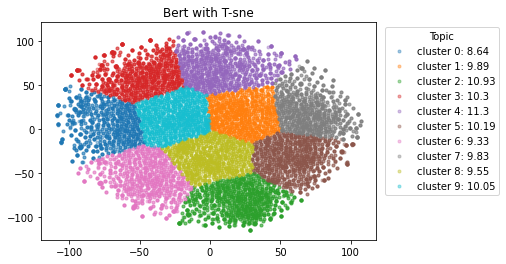

In [ ]:
#Visualize
def plot_embeddings(embedding, labels,title):

    labels = np.array( labels )
    distinct_labels =  set( labels )
    
    n = len(embedding)
    counter = Counter(labels)
    for i in range(len( distinct_labels )):
        ratio = (counter[i] / n )* 100
        cluster_label = f"cluster {i}: { round(ratio,2)}"
        x = embedding[:, 0][labels == i]
        y = embedding[:, 1][labels == i]
        plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
    plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
    plt.title(title)
    
plot_embeddings(embedding_bert_tsne,labels_bert_tsne,"Bert with T-sne")